# Privacy-Preserving for Medical Data

Description: A text classifier that classifies the medical specialty on a given diagnosis data without compromising security. <br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/DeepLearning'

/content/drive/My Drive/Colab Notebooks/DeepLearning


In [ ]:
!pip install -r 'requirements.txt'

## Exploratory Data Analysis


In [ ]:
import pandas as pd
df = pd.read_csv('./data/mtsamples.csv', delimiter=',')
df.dataframeName = 'mtsamples.csv'

In [ ]:
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


### Handle Missing Data

In [ ]:
df.isnull().sum(axis = 0)

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [ ]:
df['transcription'].fillna(df['description'], inplace=True)

List out the unique specialties in the dataset.

In [ ]:
len(df['medical_specialty'].unique())

40

and what each specialty frequencies is

In [ ]:
df['medical_specialty'].value_counts()

 Surgery                          1103
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        372
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  230
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Obstetrics / Gynecology           160
 Urology                           158
 Discharge Summary                 108
 ENT - Otolaryngology               98
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    62
 Psychiatry / Psychology            53
 Office Notes                       51
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

### Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.set()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


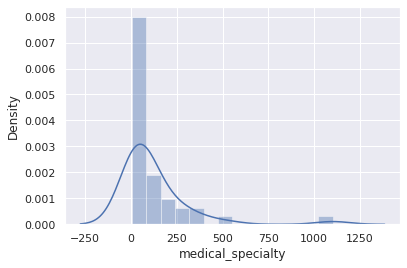

In [ ]:
sb.distplot(df['medical_specialty'].value_counts());

In [ ]:
# Code: https://help.gooddata.com/doc/en/reporting-and-dashboards/maql-analytical-query-language/maql-expression-reference/aggregation-functions/statistical-functions/predictive-statistical-use-cases/normality-testing-skewness-and-kurtosis#:~:text=As%20a%20general%20rule%20of,the%20distribution%20is%20approximately%20symmetric.
def normality_testing(sk, kt):
    sk = round(sk, 3)
    kt = round(kt, 3)
    if kt > 0:
        print("positive kurtosis =",kt) 
    else:
        print("negative kurtosis (less normal) = ",kt) 
    
    if abs(sk) > 1:
        print("skewness =",sk,"\nThe distribution is highly skewed")
    elif abs(sk >= 0.5):
        print("skewness =",sk,"\nThe distribution is moderately skewed")
    else:
        print("skewness =",sk,"\nThe distribution is approximately symmetric")

In [ ]:
skewness = df['medical_specialty'].value_counts().skew()
kurtosis = df['medical_specialty'].value_counts().kurt()

normality_testing(skewness, kurtosis)

positive kurtosis = 15.336
skewness = 3.516 
The distribution is highly skewed


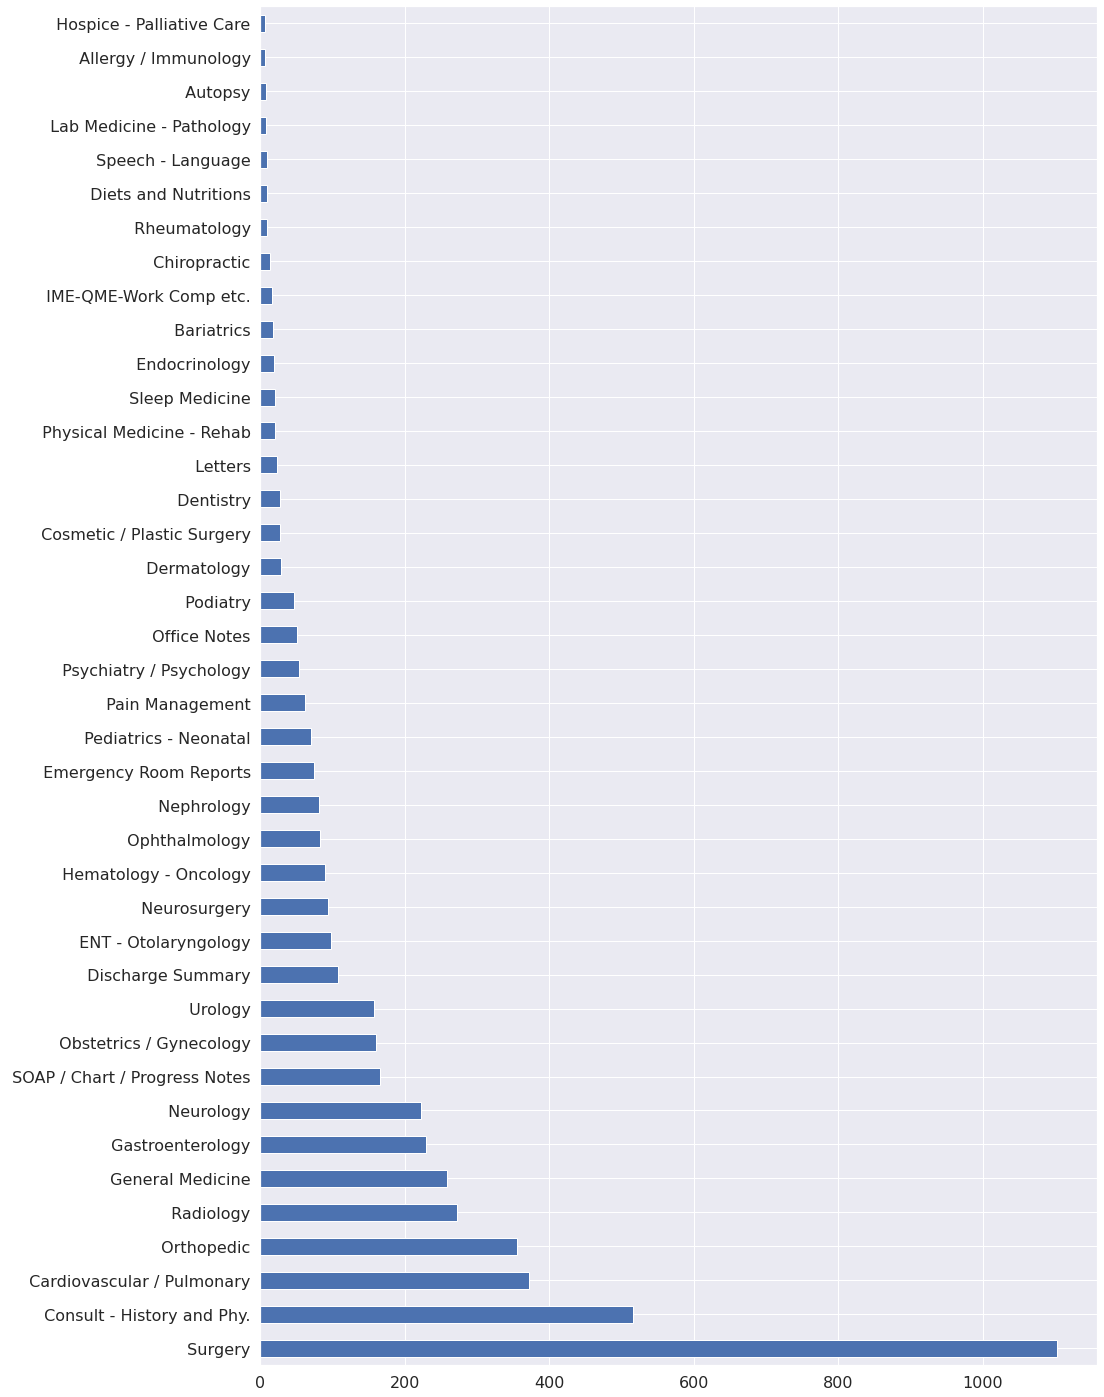

In [ ]:
df['medical_specialty'].value_counts()[:40].plot(kind='barh', figsize=(15,25), fontsize=16)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


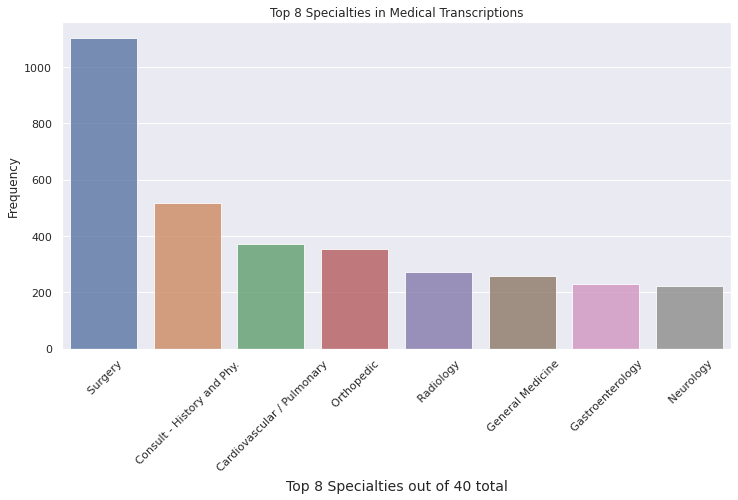

In [ ]:
fig, ax = plt.subplots(figsize = (12,6)) # set size of figure
specialty = df['medical_specialty'].value_counts()
specialty = specialty[:8,]
g = sb.barplot(specialty.index, specialty.values, alpha=0.8)

plt.title("Top 8 Specialties in Medical Transcriptions")
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Top 8 Specialties out of 40 total", fontsize=14)

g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()


### Select necessary features


In [ ]:
feature = 'medical_specialty'
df[feature] = df[feature].str.replace(r'\A ', '')
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


### Dimensionality Reduction

In [ ]:
new_class = 'Internal Medicine'

df[feature].mask(df[feature] == 'Hospice - Palliative Care', new_class, inplace=True)
df[feature].mask(df[feature] == 'Pain Management', new_class, inplace=True)
df[feature].mask(df[feature] == 'Sleep Medicine', new_class, inplace=True)
df[feature].mask(df[feature] == 'Endocrinology', new_class, inplace=True)
df[feature].mask(df[feature] == 'Gastroenterology', new_class, inplace=True)
df[feature].mask(df[feature] == 'Hematology - Oncology', new_class, inplace=True)
df[feature].mask(df[feature] == 'Nephrology', new_class, inplace=True)
df[feature].mask(df[feature] == 'Rheumatology', new_class, inplace=True)
df[feature].mask(df[feature] == 'Cardiovascular / Pulmonary', new_class, inplace=True)
df[feature].mask(df[feature] == 'General Medicine', new_class, inplace=True)

print("Reduced",feature,"to",len(df[feature].unique()),"total classes")

Reduced medical_specialty to 31 total classes


In [ ]:
new_class = 'Surgery'

df[feature].mask(df[feature] == 'Surgery', new_class, inplace=True)
df[feature].mask(df[feature] == 'Cosmetic / Plastic Surgery', new_class, inplace=True)
df[feature].mask(df[feature] == 'Neurosurgery', new_class, inplace=True)
df[feature].mask(df[feature] == 'ENT - Otolaryngology', new_class, inplace=True)
df[feature].mask(df[feature] == 'Obstetrics / Gynecology', new_class, inplace=True)
df[feature].mask(df[feature] == 'Urology', new_class, inplace=True)

print("Reduced",feature,"to",len(df[feature].unique()),"total classes")

Reduced medical_specialty to 26 total classes


In [ ]:
new_class = 'Medical Records'

df[feature].mask(df[feature] == 'Consult - History and Phy.', new_class, inplace=True)
df[feature].mask(df[feature] == 'Discharge Summary', new_class, inplace=True)
df[feature].mask(df[feature] == 'Emergency Room Reports', new_class, inplace=True)
df[feature].mask(df[feature] == 'IME-QME-Work Comp etc.', new_class, inplace=True)
df[feature].mask(df[feature] == 'Letters', new_class, inplace=True)
df[feature].mask(df[feature] == 'Office Notes', new_class, inplace=True)
df[feature].mask(df[feature] == 'SOAP / Chart / Progress Notes', new_class, inplace=True)
df[feature].mask(df[feature] == 'Radiology', new_class, inplace=True)

print("Reduced",feature,"to",len(df[feature].unique()),"total classes")

Reduced medical_specialty to 19 total classes


In [ ]:
new_class = 'Other' 

df[feature].mask(df[feature] == 'Diets and Nutritions', new_class, inplace=True)
df[feature].mask(df[feature] == 'Bariatrics', new_class, inplace=True)
df[feature].mask(df[feature] == 'Dentistry', new_class, inplace=True)
df[feature].mask(df[feature] == 'Ophthalmology', new_class, inplace=True)
df[feature].mask(df[feature] == 'Pediatrics - Neonatal', new_class, inplace=True)
df[feature].mask(df[feature] == 'Dermatology', new_class, inplace=True)
df[feature].mask(df[feature] == 'Allergy / Immunology', new_class, inplace=True)
df[feature].mask(df[feature] == 'Speech - Language', new_class, inplace=True)
df[feature].mask(df[feature] == 'Psychiatry / Psychology', new_class, inplace=True)
df[feature].mask(df[feature] == 'Autopsy', new_class, inplace=True)
df[feature].mask(df[feature] == 'Lab Medicine - Pathology', new_class, inplace=True)
df[feature].mask(df[feature] == 'Physical Medicine - Rehab', new_class, inplace=True)
df[feature].mask(df[feature] == 'Orthopedic', new_class, inplace=True)
df[feature].mask(df[feature] == 'Chiropractic', new_class, inplace=True)
df[feature].mask(df[feature] == 'Podiatry', new_class, inplace=True)
df[feature].mask(df[feature] == 'Neurology', new_class, inplace=True)

print("Reduced",feature,"to",len(df[feature].unique()),"total classes")

Reduced medical_specialty to 4 total classes


In [ ]:
df['medical_specialty'].unique()

array(['Other', 'Internal Medicine', 'Surgery', 'Medical Records'],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


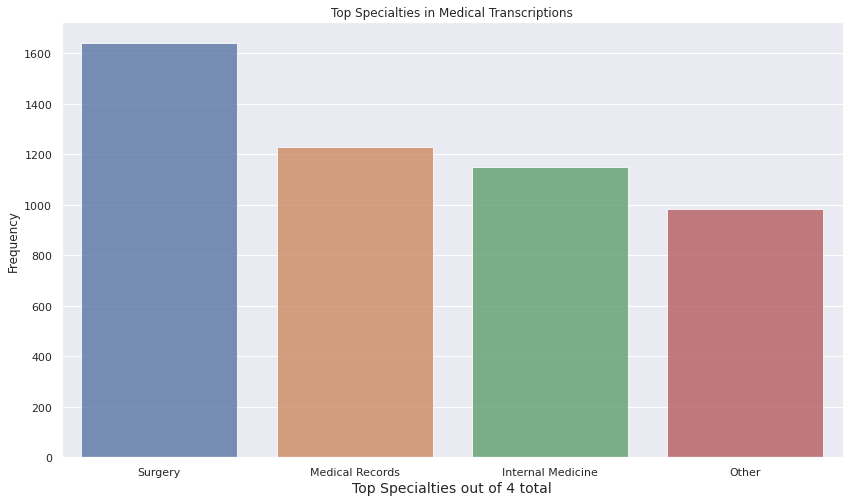

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))
specialty = df['medical_specialty'].value_counts()
specialty = specialty[::,]
g = sb.barplot(specialty.index, specialty.values, alpha=0.8)

total = str(len(df['medical_specialty'].unique()))
plt.title("Top Specialties in Medical Transcriptions")
plt.ylabel("Frequency", fontsize=12)

x_label_str = "Top Specialties out of " + total +" total"
plt.xlabel(x_label_str, fontsize=14)

g.set_xticklabels(g.get_xticklabels(), rotation=0)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


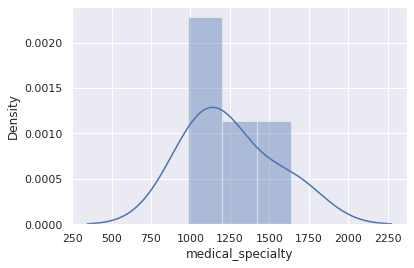

In [ ]:
sb.distplot(df['medical_specialty'].value_counts());

In [ ]:
skewness = df['medical_specialty'].value_counts().skew()
kurtosis = df['medical_specialty'].value_counts().kurt()

normality_testing(skewness,kurtosis)

positive kurtosis = 1.999
skewness = 1.195 
The distribution is highly skewed


### Output classes

In [ ]:
keys = [3,2,4,1]
values = sorted(df['medical_specialty'].unique())
zipObj = zip(keys,values)
classes_dict = dict(zipObj)
classes_dict

{1: 'Surgery', 2: 'Medical Records', 3: 'Internal Medicine', 4: 'Other'}

In [ ]:
classes_dict = sorted(classes_dict.items())
classes_dict = dict(classes_dict)

In [ ]:
classes_dict

{1: 'Surgery', 2: 'Medical Records', 3: 'Internal Medicine', 4: 'Other'}

In [ ]:
classes_file = open("./data/classes.txt","w") 
for i in classes_dict:
    classes_file.write(classes_dict[i]) 
    classes_file.write("\n")

classes_file.close()

### Consolidating the standardized dataset

In [ ]:
features = ['medical_specialty','sample_name','transcription','keywords']

X = df[features]
X.head()

,medical_specialty,sample_name,transcription,keywords
0,Other,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Other,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Other,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,Internal Medicine,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,Internal Medicine,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
X.isnull().sum(axis = 0)

medical_specialty       0
sample_name             0
transcription           0
keywords             1068
dtype: int64

In [ ]:
# Merging columns
X['text'] = X['transcription'] + X['keywords'].astype(str)
X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,medical_specialty,sample_name,transcription,keywords,text
0,Other,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...","SUBJECTIVE:, This 23-year-old white female pr..."
1,Other,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...","PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Other,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...","HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Internal Medicine,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...","2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Internal Medicine,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",1. The left ventricular cavity size and wall ...


In [ ]:
X = X.drop(['transcription', 'keywords'], axis=1)
X.head()

,medical_specialty,sample_name,text
0,Other,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Other,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Other,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Internal Medicine,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Internal Medicine,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...


In [ ]:
X.isnull().sum(axis = 0)

medical_specialty    0
sample_name          0
text                 0
dtype: int64

In [ ]:
for key in classes_dict.keys():
  X.loc[(X['medical_specialty'] == classes_dict[key]),'medical_specialty']=key

X.head()

,medical_specialty,sample_name,text
0,4,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr..."
1,4,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,4,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,3,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,3,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...


In [ ]:
X = X.rename(columns={"medical_specialty": "label", "sample_name": "description"})
X.head()

,label,description,text
0,4,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr..."
1,4,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,4,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,3,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,3,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...


In [ ]:
X.to_csv('./data/X.csv', index = False)

## Encrypted Training Demo on Medical Text Data using SyferText

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.1)

X_train.to_csv('./data/train.csv', index = False)
X_test.to_csv('./data/test.csv', index = False)

### Importing libraries (PySyft and SyfterText)

In [ ]:
!curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash

Detected operating system as Ubuntu/bionic.
Checking for curl...
Detected curl...
Checking for gpg...
Detected gpg...
Running apt-get update... done.
Installing apt-transport-https... done.
Installing /etc/apt/sources.list.d/github_git-lfs.list...done.
Importing packagecloud gpg key... done.
Running apt-get update... done.

The repository is setup! You can now install packages.


In [ ]:
!sudo apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 6,886 kB of archives.
After this operation, 16.4 MB of additional disk space will be used.
Get:1 https://packagecloud.io/github/git-lfs/ubuntu bionic/main amd64 git-lfs amd64 2.12.1 [6,886 kB]
Fetched 6,886 kB in 1s (8,543 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package git-lfs.
(Reading database ... 144869 files and direct

In [ ]:
!git lfs install

Git LFS initialized.


In [ ]:
!pip install  git+git://github.com/Nilanshrajput/syfertext_en_core_web_lg@master

  Cloning git://github.com/Nilanshrajput/syfertext_en_core_web_lg (to revision master) to /tmp/pip-req-build-x29ab39v
  Running command git clone -q git://github.com/Nilanshrajput/syfertext_en_core_web_lg /tmp/pip-req-build-x29ab39v
  Filtering content: 100% (3/3), 820.61 MiB | 45.34 MiB/s, done.
     |████████████████████████████████| 20.2MB 61.6MB/s 
  Created wheel for syfertext-en-core-web-lg: filename=syfertext_en_core_web_lg-0.0.1-cp36-none-any.whl size=774464160 sha256=27b3f2503b9692db75284c152472cc55cf0b2812502fce10b26e855f20304f31
  Stored in directory: /tmp/pip-ephem-wheel-cache-cqu7hcxr/wheels/59/55/ab/309821e4cc31d9f53129229bd3ad759276e30fb8daef7ddeef
Successfully built syfertext-en-core-web-lg
ERROR: google-colab 1.0.0 has requirement notebook~=5.3.0; python_version >= "3.0", but you'll have notebook 5.7.8 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.22.0 which is incompatible.
ERROR: google-colab 1.0.0 has r

In [ ]:
!git clone https://github.com/OpenMined/SyferText.git

Cloning into 'SyferText'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 2405 (delta 23), reused 25 (delta 9), pack-reused 2346
Receiving objects: 100% (2405/2405), 1.11 MiB | 9.79 MiB/s, done.
Resolving deltas: 100% (1592/1592), done.


In [ ]:
!python 'SyferText/setup.py' install

/usr/lib/python3.6/distutils/dist.py:261: UserWarning: Unknown distribution option: 'classifier'
  warnings.warn(msg)
running install
running bdist_egg
running egg_info
creating syfertext.egg-info
writing syfertext.egg-info/PKG-INFO
writing dependency_links to syfertext.egg-info/dependency_links.txt
writing requirements to syfertext.egg-info/requires.txt
writing top-level names to syfertext.egg-info/top_level.txt
writing manifest file 'syfertext.egg-info/SOURCES.txt'
reading manifest file 'syfertext.egg-info/SOURCES.txt'
writing manifest file 'syfertext.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying syfertext.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying syfertext.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying syfertext.egg-info/dependency_links.txt ->

In [ ]:
%cd SyferText/

/content/SyferText


In [ ]:
!pip install syft==0.2.9

  Using cached https://files.pythonhosted.org/packages/1c/73/891ba1dca7e0ba77be211c36688f083184d8c9d5901b8cd59cbf867052f3/syft-0.2.9-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5f/19/d4c25111d36163698396f93c363114cf1cddbacb24744f6612f25b6aa3d0/Pillow-8.0.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/da/88/67edf7836ac4eab723416933cd663c4f87753d3ff31337f91701c0b75474/syft_proto-0.5.3-py3-none-any.whl
ERROR: bokeh 2.1.1 has requirement tornado>=5.1, but you'll have tornado 4.5.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
ERROR: syfertext 0.0.1 has requirement syft==0.2.8, but you'll have syft 0.2.9 which is incompatible.
ERROR: syfertext 0.0.1 has requirement tqdm==4.36.1, but you'll have tqdm 4.41.1 which is incompatible.
  Found existing installation: Pillow 6.2.2
    Uninstalling Pillow-6.2.2:
      Successfully unins

In [ ]:
import sys, os
if os.getcwd() not in sys.path:
  sys.path.append(os.getcwd())

import syfertext
from syfertext.pipeline import SimpleTagger

In [ ]:
%cd ..

/content


In [ ]:
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/syfertext-0.0.1-py3.6.egg',
 '/usr/local/lib/python3.6/dist-packages/syft-0.2.8-py3.6.egg',
 '/usr/local/lib/python3.6/dist-packages/mmh3-2.5.1-py3.6-linux-x86_64.egg',
 '/usr/local/lib/python3.6/dist-packages/tqdm-4.36.1-py3.6.egg',
 '/usr/local/lib/python3.6/dist-packages/syft_proto-0.5.3-py3.6.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/SyferText']

### Virtual environment using PySyft

In [ ]:
import syft as sy
from syft.generic.string import String

import torch
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch.optim as optim

import numpy as np
import csv
import os
from pprint import pprint

A work environment is simulated with three main actors - a company and two clients owning two private datasets (Bob and Alice), and also a crypto provider which will provide the primitives for Secure Multi-Party Computation (SMPC). 

In [ ]:
# Create a torch hook for PySyft
hook = sy.TorchHook(torch)

# Create some PySyft workers
me = hook.local_worker # This is the worker representing the deep learning company
bob = sy.VirtualWorker(hook, id = 'bob') # Bob owns the first dataset
alice = sy.VirtualWorker(hook, id = 'alice') # Alice owns the second dataset

crypto_provider = sy.VirtualWorker(hook, id = 'crypto_provider') # provides encryption primitive for SMPC

### Loading dataset locally

In [ ]:
dataset_path = 'data/train.csv'
dataset_local = []

In [ ]:
with open(dataset_path, 'r') as dataset_file:
  reader = csv.DictReader(dataset_file)
  for elem in reader:
    example = dict(text = String(elem['text']), label = 1 if elem['label'] == '1' else 0)
    dataset_local.append(example)

In [ ]:
from random import randint

random_index = randint(0,len(dataset_local))
print("Entry #",random_index)
example = dataset_local[random_index]
pprint(example)

Entry # 4435
{'label': 1,
 'text': "PREOPERATIVE DIAGNOSES:,1.  Intrauterine pregnancy of 39 weeks.,2.  Herpes simplex virus, positive by history.,3.  Hepatitis C, positive by history with low elevation of transaminases.,4.  Cephalopelvic disproportion.,5.  Asynclitism.,6.  Postpartum macrosomia.,POSTOPERATIVE DIAGNOSES:,1.  Intrauterine pregnancy of 39 weeks.,2.  Herpes simplex virus, positive by history.,3.  Hepatitis C, positive by history with low elevation of transaminases.,4.  Cephalopelvic disproportion.,5.  Asynclitism.,6.  Postpartum macrosomia.,7.  Delivery of viable 9 lb female neonate.,PROCEDURE PERFORMED: , Primary low transverse cervical cesarean section.,COMPLICATIONS:,  None.,ESTIMATED BLOOD LOSS: , About 600 cc.,Baby is doing well.  The patient's uterus is intact, bladder is intact.,HISTORY: , The patient is an approximately 25-year-old Caucasian female with gravida-4, para-1-0-2-1.  The patient's last menstrual period was in December of 2002 with a foreseeable due dat

In [ ]:
print(type(example['text']))
print(type(example['label']))

<class 'syft.generic.string.String'>
<class 'int'>


### Distributing documents privately

We simulate two private datasets owned by two clients.

1. Load the whole dataset in `mtsamples.csv` locally. The data will be loaded as a list of dictionaries that has the following format: `[ {'transcription': <transcription text>, 'label': <0 or 1>}, {...}, {...}]`


2. Split the dataset into two parts, one for Bob and the other for Alice. Each part will be also split into a training set and a validation set. This will create four lists: `train_bob`, `valid_bob`, `train_alice`, `valid_alice`. Each list has the same format mentioned above.


3. Each element in the four lists will be sent to the corresponding worker.

In [ ]:
# Create two datasets, one for Bob and another one for Alice
dataset_bob, dataset_alice = train_test_split(dataset_local[:25000], train_size = 0.5)

train_bob, val_bob = train_test_split(dataset_bob, train_size = 0.9)
train_alice, val_alice = train_test_split(dataset_alice, train_size = 0.9)

Making the datasets remote:

In [ ]:
# Sends the content of each split to a remote worker
def make_remote_dataset(dataset, worker):
    for example in dataset:        
      example['text'] = example['text'].send(worker)
      one_hot_label = torch.zeros(2).scatter(0, torch.Tensor([example['label']]).long(), 1)
      example['label'] = one_hot_label.send(worker)

In [ ]:
# Bob's remote dataset
make_remote_dataset(train_bob, bob)
make_remote_dataset(val_bob, bob)

# Alice's remote dataset
make_remote_dataset(train_alice, alice)
make_remote_dataset(val_alice, alice)

In [ ]:
example = train_bob[0]

print(type(example['text']))
print(example['label'])

<class 'syft.generic.pointers.string_pointer.StringPointer'>
(Wrapper)>[PointerTensor | me:17004530703 -> bob:31056145251]


In [ ]:
print(example['text'].location)
print(example['label'].location)

<VirtualWorker id:bob #objects:4498>
<VirtualWorker id:bob #objects:4498>


### Creating a `SyferText` Language object and a NLP pipeline

In [ ]:
nlp = syfertext.load('en_core_web_lg', owner = me)

In [ ]:
nlp.pipeline_template

[{'name': 'tokenizer', 'remote': True}]

In [ ]:
type(nlp)

syfertext.language.Language

### Adding the taggers to the pipeline

In [ ]:
use_stop_tagger = True
use_vocab_tagger = True

excluded_tokens = {}

### Creating a  tagger for stop words

In [ ]:
with open('./data/clinical-stopwords.txt', 'r') as f:
  stop_words = set(f.read().splitlines())

In [ ]:
stop_tagger = SimpleTagger(attribute = 'is_stop', lookups = stop_words, tag = True, default_tag = False, case_sensitive = False)

In [ ]:
if use_stop_tagger:
  nlp.add_pipe(name = 'stop tagger', component = stop_tagger, remote = True)
  excluded_tokens['is_stop'] = {True}

### Creating a  tagger for vocabulary words

In [ ]:
with open('./data/vocab.txt', 'r') as f:
  vocab_words = set(f.read().splitlines())

In [ ]:
vocab_tagger = SimpleTagger(attribute = 'is_vocab', lookups = vocab_words, tag = True, default_tag = False, case_sensitive = False)

In [ ]:
if use_vocab_tagger: 
  nlp.add_pipe(name = 'vocab tagger', component = vocab_tagger, remote = True)
  excluded_tokens['is_vocab'] = {False}

In [ ]:
nlp.pipeline_template

[{'name': 'tokenizer', 'remote': True},
 {'name': 'stop tagger', 'remote': True},
 {'name': 'vocab tagger', 'remote': True}]

### Create and load datasets

In [ ]:
# Code: https://github.com/OpenMined/SyferText/blob/master/tutorials/usecases/UC01%20-%20Sentiment%20Classifier%20-%20Private%20Datasets%20-%20(Secure%20Training).ipynb

class DatasetMTS(Dataset):
  def __init__(self, sets, share_workers, crypto_provider, nlp):
    self.sets = sets
    self.crypto_provider = crypto_provider
    self.workers = share_workers

    self._create_dataset()
    
    self.nlp = nlp
      
  def __getitem__(self, index):    
    example = self.dataset[index]

    doc_ptr = self.nlp(example['text'])
    
    vector_enc = doc_ptr.get_encrypted_vector(bob,  alice, crypto_provider = self.crypto_provider, requires_grad = True, excluded_tokens = excluded_tokens)
    
    label_enc = example['label'].fix_precision().share(bob, alice, crypto_provider = self.crypto_provider, requires_grad = True).get()

    return vector_enc, label_enc
    
  def __len__(self):
    return len(self.dataset)

  def _create_dataset(self):
    self.dataset = []
  
    for dataset in self.sets:
        for example in dataset:
            self.dataset.append(example)
                
  @staticmethod
  def collate_fn(batch):
    vectors, targets = list(zip(*batch))
    vectors = torch.stack(vectors)    
    targets = torch.stack(targets)        
    
    return vectors, targets

In [ ]:
trainset = DatasetMTS(sets = [train_bob, train_alice], share_workers = [bob, alice], crypto_provider = crypto_provider, nlp = nlp)

valset = DatasetMTS(sets = [val_bob, val_alice], share_workers = [bob, alice], crypto_provider = crypto_provider, nlp = nlp)

In [ ]:
vec_enc, label_enc = trainset.__getitem__(1)
print(f' Training Vector size is {vec_enc.shape[0]}')

 Training Vector size is 300


### Training the model 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
EMBED_DIM = vec_enc.shape[0]
BATCH_SIZE = 128
LEARNING_RATE = 0.001
EPOCHS = 3
NUM_CLASS = 2

In [ ]:
trainloader = DataLoader(trainset, shuffle = True, batch_size = BATCH_SIZE, num_workers = 0,  collate_fn = trainset.collate_fn)
valloader = DataLoader(valset, shuffle = True, batch_size = BATCH_SIZE, num_workers = 0, collate_fn = valset.collate_fn)

In [ ]:
class RNN(torch.nn.Module):
    
    def __init__(self, in_features, out_features):
        super(RNN, self).__init__()
        
        self.fc1 = torch.nn.Linear(in_features, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 32)
        self.fc4 = torch.nn.Linear(32, 16)
        self.fc5 = torch.nn.Linear(16, out_features)
                
    def forward(self, inputs):

        x = F.relu(self.fc1(inputs.squeeze(1)))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))

        logits = self.fc5(x)
        
        probs = F.relu(logits)

        return probs, logits

In [ ]:
# Create the classifer
model = RNN(in_features = EMBED_DIM, out_features = NUM_CLASS)

# Apply SMPC encryption
model = model.fix_precision().share(bob, alice, crypto_provider = crypto_provider, requires_grad = True)
print(model)

RNN(
  (fc1): Linear(in_features=300, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=16, bias=True)
  (fc5): Linear(in_features=16, out_features=2, bias=True)
)


In [ ]:
optimizer = optim.SGD(params = model.parameters(),lr = LEARNING_RATE, momentum=0.3)
optimizer = optimizer.fix_precision()

In [ ]:
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: FixedPrecisionTensor>tensor(1)
    momentum: FixedPrecisionTensor>tensor(300)
    nesterov: False
    weight_decay: 0
)


### Tensorboard and Model Training

In [ ]:
writer = SummaryWriter()


Open a terminal, navigate to the folder containing this notebook, and run:

```
$ tensorboard --logdir runs/
```

Open your browser and go to `localhost:6006`.

In [ ]:
train_losses = []
train_acc = []
train_iter = []
val_losses = []
val_acc = []
val_iter = []


for epoch in range(EPOCHS):
    
    for iter, (vectors, targets) in enumerate(trainloader):
      model.train()
      optimizer.zero_grad()

      probs, logits = model(vectors)
      loss = ((probs -  targets)**2).sum()

      preds = probs.argmax(dim=1)
      targets = targets.argmax(dim=1)
        
      accuracy = (preds == targets).sum()
      accuracy = accuracy.get().float_precision()
      accuracy = 100 * (accuracy / BATCH_SIZE)
        
      loss.backward()
  
      optimizer.step()

      loss = loss.get().float_precision()
        
      train_i = 1 + epoch * len(trainloader) + iter 
        
      train_losses.append(loss.item())
      train_iter.append(train_i)
      train_acc.append(accuracy)

      print("epoch:",epoch+1,f'\tLoss: {loss:.2f}(train)\t|\tAcc: {accuracy:.2f}%(train)', train_i)    

      writer.add_scalar('train/loss', loss, train_i)
      writer.add_scalar('train/acc', accuracy, train_i)

      if train_i > 100:
          break

      model.eval()

      for vectors, targets in valloader:
        probs, logits = model(vectors)

        loss = ((probs -  targets)**2).sum()

        preds = probs.argmax(dim=1)
        targets = targets.argmax(dim=1)

        accuracy = preds.eq(targets).sum()
        accuracy = accuracy.get().float_precision()
        accuracy = 100 * (accuracy / BATCH_SIZE)

        loss = loss.get().float_precision()
        
        val_i = 1 + epoch * len(trainloader) + iter 
        
        val_losses.append(loss.item())
        val_iter.append(val_i) 
        val_acc.append(accuracy)
        
        print("epoch:",epoch+1,f'\tLoss: {loss:.2f}(valid)\t|\tAcc: {accuracy:.2f}%(valid)', val_i)
        
        writer.add_scalar('val/loss', loss, val_i)
        writer.add_scalar('val/acc', accuracy, val_i)
          
        break
            
writer.close()

epoch: 1 	Loss: 126.72(train)	|	Acc: 34.38%(train) 1
epoch: 1 	Loss: 110.43(valid)	|	Acc: 25.00%(valid) 1
epoch: 1 	Loss: 110.15(train)	|	Acc: 29.69%(train) 2
epoch: 1 	Loss: 70.01(valid)	|	Acc: 65.62%(valid) 2
epoch: 1 	Loss: 69.78(train)	|	Acc: 66.41%(train) 3
epoch: 1 	Loss: 55.28(valid)	|	Acc: 68.75%(valid) 3
epoch: 1 	Loss: 54.78(train)	|	Acc: 69.53%(train) 4
epoch: 1 	Loss: 58.21(valid)	|	Acc: 65.62%(valid) 4
epoch: 1 	Loss: 58.30(train)	|	Acc: 65.62%(train) 5
epoch: 1 	Loss: 52.95(valid)	|	Acc: 70.31%(valid) 5
epoch: 1 	Loss: 51.28(train)	|	Acc: 71.88%(train) 6
epoch: 1 	Loss: 51.35(valid)	|	Acc: 71.88%(valid) 6
epoch: 1 	Loss: 58.55(train)	|	Acc: 64.06%(train) 7
epoch: 1 	Loss: 53.36(valid)	|	Acc: 69.53%(valid) 7
epoch: 1 	Loss: 57.77(train)	|	Acc: 64.06%(train) 8
epoch: 1 	Loss: 50.95(valid)	|	Acc: 73.44%(valid) 8
epoch: 1 	Loss: 60.82(train)	|	Acc: 60.16%(train) 9
epoch: 1 	Loss: 54.16(valid)	|	Acc: 69.53%(valid) 9
epoch: 1 	Loss: 52.32(train)	|	Acc: 73.44%(train) 10
epoch: 1

epoch: 3 	Loss: 37.75(valid)	|	Acc: 75.78%(valid) 78
epoch: 3 	Loss: 33.74(train)	|	Acc: 82.03%(train) 79
epoch: 3 	Loss: 30.43(valid)	|	Acc: 83.59%(valid) 79
epoch: 3 	Loss: 30.11(train)	|	Acc: 78.91%(train) 80
epoch: 3 	Loss: 30.86(valid)	|	Acc: 79.69%(valid) 80
epoch: 3 	Loss: 35.64(train)	|	Acc: 78.91%(train) 81
epoch: 3 	Loss: 39.51(valid)	|	Acc: 76.56%(valid) 81
epoch: 3 	Loss: 37.20(train)	|	Acc: 75.78%(train) 82
epoch: 3 	Loss: 32.95(valid)	|	Acc: 81.25%(valid) 82
epoch: 3 	Loss: 35.23(train)	|	Acc: 80.47%(train) 83
epoch: 3 	Loss: 34.29(valid)	|	Acc: 78.91%(valid) 83
epoch: 3 	Loss: 35.13(train)	|	Acc: 79.69%(train) 84
epoch: 3 	Loss: 27.50(valid)	|	Acc: 82.03%(valid) 84
epoch: 3 	Loss: 38.06(train)	|	Acc: 79.69%(train) 85
epoch: 3 	Loss: 30.58(valid)	|	Acc: 80.47%(valid) 85
epoch: 3 	Loss: 40.42(train)	|	Acc: 74.22%(train) 86
epoch: 3 	Loss: 36.16(valid)	|	Acc: 77.34%(valid) 86
epoch: 3 	Loss: 33.85(train)	|	Acc: 81.25%(train) 87
epoch: 3 	Loss: 30.28(valid)	|	Acc: 83.59%(val

## Accuracy and Loss

In [ ]:
sns.set(rc={'figure.figsize':(12, 6)})

event_list = []
total_accuracy = []
total_loss = []
 
for (train, val) in zip(train_acc, val_acc):
  total_accuracy.append(train)
  event_list.append('Training')
  total_accuracy.append(val)
  event_list.append('Validation')

for (train, val) in zip(train_losses, val_losses):
  total_loss.append(train)
  total_loss.append(val)

accuracy_df = pd.concat([train_iter, total_accuracy, event_list])
accuracy_df.columns = ['Iteration', 'Accuracy', 'Event']

loss_df = pd.concat([train_iter, total_loss, event_list])
loss_df.columns = ['Iteration', 'Loss', 'Event']

sns.lineplot(x="Iteration", y="Accuracy", hue='Event', ci=68, data=loss_df)
sns.lineplot(x="Iteration", y="Accuracy", hue='Event', ci=68, data=accuracy_df)

**Note**: The accuracy and loss history variables were lost during the re-training process and therefore I have attached images previously saved in my drive for the report.

![Loss](https://drive.google.com/uc?export=view&id=1H2kBenqGAJmtNZ-qOsaWdtqU-XqJKoau)

![Accuracy](https://drive.google.com/uc?export=view&id=1o2S_Ggwp0chwpHMYxhkvib713m9BLLfK)



## References

1. https://github.com/OpenMined/SyferText/blob/master/tutorials/usecases/UC01%20-%20Sentiment%20Classifier%20-%20Private%20Datasets%20-%20(Secure%20Training).ipynb
2. https://www.kaggle.com/tboyle10/medicaltranscriptions
3. https://www.mtsamples.com/
4. https://github.com/OpenMined/SyferText
5. https://github.com/OpenMined/PySyft
6. https://blog.openmined.org/encrypted-training-medical-text-syfertext/